In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question** Load `heart_Disease.csv` in a  `dataframe`. Examine the data, compute descriptive satistics.

In [2]:
df = pd.read_csv('heart_Disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Observation

**Question** Read the documentation about `nunique` (pandas). According to the values returned by `nunique` which attributes should be considered as discrete attributes?

In [4]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

*Réponse*: The attibutes sex, cp, fbs, restecg, exang, slope, ca, thal and target should be considered unique values since they have very few (less than 5) unique values.

**Question** Define the list `attrs_cont` of continuous attributes and the list `attrs_cat`  of categorical attributes.

In [54]:
attrs_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
attrs_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

**Question** A `DataFrame` is a collection of `Series` which are the columns. You can also look at the different values that columns can take with `value_counts`. Look at the different values for each column and in particular for the `target`.

In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

**Question** Draw histograms representing these counts. You can use the `hist` method directly from `DataFrames` or `Series`.

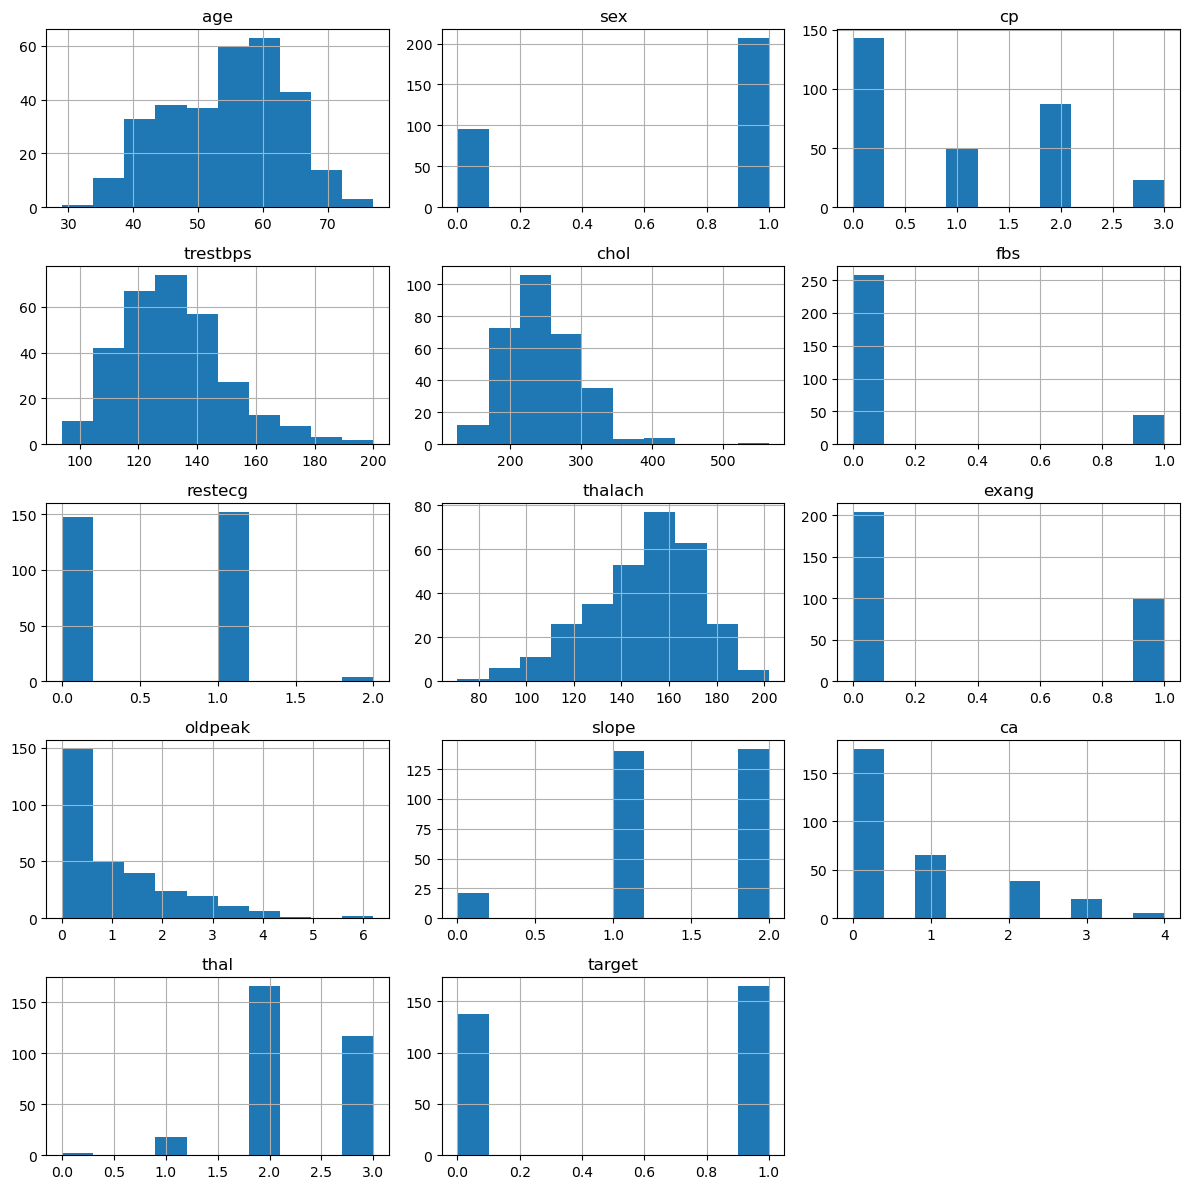

In [88]:
df.hist(layout=(5,3), figsize=(12, 12))
plt.tight_layout()
plt.show()

# Reminder: Pandas

In [22]:
df['age'].head()  # sélection d'une colonne

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [23]:
df[['age', 'sex']].head() # sélection de colonnes

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [24]:
df.iloc[:,0:2].head() # sélection lignes et de colonnes par les indices

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [25]:
df['sex']==0  # filtre, série de booléens

0      False
1      False
2       True
3      False
4       True
       ...  
298     True
299    False
300    False
301    False
302     True
Name: sex, Length: 303, dtype: bool

In [26]:
df[df['sex']==0] # application d'un filtre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [27]:
df[df['sex']==0][['age','slope']]  # cumuler un filtre et une sélection

,age,slope
2,41,2
4,57,2
6,56,1
11,48,2
14,58,2
...,...,...
289,55,1
292,58,1
296,63,1
298,57,1


# Data preparation

**Question** Prepare the data set to be able to evaluate the training and test error. Use the default parameters and a random state 0.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 13) (76, 13) (227,) (76,)


In [15]:
type(X_train)

pandas.core.frame.DataFrame

# Majority rule

**Question** In a classification problem, we always have to evaluate the performance of a classifier against something very simple, which is the constant function that predicts the most frequent class. According to the statistics, how would such a rule perform on the full sample?

*Réponse* : 54%

```
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64
```

Among the 303 total values, target = 1 is the most frequent class. So since 165/303 = 0.54, the rule performs at 54% on the full sample. 

**Question** You can find other very simple classifiers like the majority rule in the `dummy` package in sklearn. Make such a classifier that predicts the majority class with one of the instances of one of the modules in this package.

In [6]:
from sklearn.dummy import DummyClassifier

In [7]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(df['age'], df['target'])
dummy_clf.predict(df['age'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
dummy_clf.fit(df['ca'], df['target'])
dummy_clf.predict(df['ca'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
dummy_clf.score(df['ca'], df['target'])

0.5445544554455446

# Naive Bayes

**Question** Read the [sklearn page dedicated to NaiveBayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). In the following, you will do the computations by hand... 

**Question** Let us consider the attributes `sex` and `fbs`. Let's calculate the number of times `sex` is 1 and 0 when the target `target` is 1. You can define `nb_s1t1` and `nb_s0t1`

(Use `value_counts` and the pandas syntax.)

In [10]:
nbst1 = df[df['target']==1][['sex']].value_counts()
nbst1

sex
1      93
0      72
Name: count, dtype: int64

In [11]:
nb_st1 = nbst1[1] + nbst1[0]
nb_st1

165

In [12]:
nb_s1t1 = nbst1[1]
nb_s1t1

93

In [13]:
nb_s0t1 = nbst1[0]
nb_s0t1

72

**Question** Calculate `p1s1`  P(sex=1|target=1) and `p1s0` P(sex=0|target=1)

In [15]:
p1s1 = nb_s1t1 / (nb_s1t1 + nb_s0t1)
p1s1 # 93/165

0.5636363636363636

In [16]:
p1s0 = nb_s0t1 / (nb_s1t1 + nb_s0t1)
p1s0 # 72/165

0.43636363636363634

**Question** Let's take the attributes `sex` and `fbs`. Let's calculate the following probabilities on the train sample.
- P(sex|target), i.e. the 4 values P(sex=1|target=1), P(sex=0|target=1), P(sex=1|target=0), P(sex=0|target=0). Named `p1s1, p1s0, p0s1, p0s0` 
- P(fbs|target) (4 values). Named `p1f1, p1f0, p0f1, p0f0` 

In [23]:
nbst1 = X_train[y_train==1][['sex']].value_counts()
nbst0 = X_train[y_train==0][['sex']].value_counts()

nb_st1 = nbst1[1] + nbst1[0]
nb_st0 = nbst0[1] + nbst0[0]

In [35]:
p1s1 = nbst1[1] / nb_st1 # nb_s1t1 / (nb_s1t1 + nb_s0t1)
p0s1 = nbst0[1] / nb_st0
p1s0 = nbst1[0] / nb_st1
p0s0 = nbst0[0] / nb_st0
print(p1s1, p1s0, p0s1, p0s0)

0.5163934426229508 0.48360655737704916 0.8476190476190476 0.1523809523809524


In [36]:
nbft1 = X_train[y_train==1][['fbs']].value_counts()
nbft0 = X_train[y_train==0][['fbs']].value_counts()

nb_ft1 = nbft1[1] + nbft1[0]
nb_ft0 = nbft0[1] + nbft0[0]

In [37]:
p1f1 = nbft1[1] / nb_ft1
p0f1 = nbft0[1] / nb_ft0
p1f0 = nbft1[0] / nb_ft1
p0f0 = nbft0[0] / nb_ft0
print(p1f1, p1f0, p0f1, p0f0)

0.13114754098360656 0.8688524590163934 0.18095238095238095 0.819047619047619


**Question** Still on the train, what are the probabilities of having the target at 1 or 0? `p1`, `p0`

In [43]:
p1 = y_train.value_counts()[1] / y_train.size
p1

np.float64(0.5374449339207048)

In [44]:
p0 = y_train.value_counts()[0] / y_train.size
p0

np.float64(0.46255506607929514)

**Question** Now let's take the first example of the test and look at the `sex` and `fbs` attributes. With the Naive Bayes model, what value of the target would be predicted and why? 

In [20]:
ex = X_test.iloc[0]
ex

age          70.0
sex           1.0
cp            0.0
trestbps    145.0
chol        174.0
fbs           0.0
restecg       1.0
thalach     125.0
exang         1.0
oldpeak       2.6
slope         0.0
ca            0.0
thal          3.0
Name: 225, dtype: float64

In [47]:
y0 = p0 * p0s1 * p0f0
y0

np.float64(0.321124396895322)

In [48]:
y1 = p1 * p1s1 * p1f0
y1

np.float64(0.24113526395609156)

*Réponse* : 
Naive bayes : $argmax_y P(y|x) = P(y)\prod_{k}P(x_k | y)$

For the first example in the test set, sex = 1 and fbs = 0.

* $y = 0 : P(y=0) * P(sex=1 | y=0)  * P(fbs=0 | y=0) =$

= p0 * p0s1 * p0f0
          
= 0.321
* $y = 1 : P(y=1) * P(sex=1 | y=1) * P(fbs=0 | y=1) =$

= p1 * p1s1 * p1f0
          
= 0.241
          
y=0 is the answer since it has the greater probability.

**Question** Import `CategoricalNB` and apply the classifier, taking only the `sex` and `fbs` attributes into account, to find these results.

In [17]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()

In [40]:
clf.fit(X_train[['sex','fbs']], y_train)
clf.predict(X_test[['sex', 'fbs']].iloc[[0]])  
clf.predict_proba(X_test[['sex', 'fbs']].iloc[[0]])

array([[0.56926442, 0.43073558]])

**Question** Apply the classifier to the categorical attributes and estimate the score.

In [57]:
X_cat_train = X_train[attrs_cat]
X_cat_test  = X_test[attrs_cat]

cnb = CategoricalNB()
cnb.fit(X_cat_train, y_train)
cnb.score(X_cat_test, y_test)

0.8026315789473685

# Decision Trees

**Question** Use the `DecisionTreeClassifier` class from the `tree` package to create a decision tree. What is the score obtained on the test set?

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7894736842105263

**Question** Display this tree in text and drawing form.

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- thalach <= 119.50
|   |   |   |   |--- class: 0
|   |   |   |--- thalach >  119.50
|   |   |   |   |--- thal <= 1.50
|   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  54.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- thal >  1.50
|   |   |   |   |   |--- age <= 60.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  60.00
|   |   |   |   |   |   |--- thalach <= 166.00
|   |   |   |   |   |   |   |--- trestbps <= 145.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- trestbps >  145.00
|   |   |   |   |   |   |   |   |--- trestbps <= 165.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- trestbps >  165.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- thalach >  166.00
|   |   |   |   |   |   |   |--- class: 0
|   | 

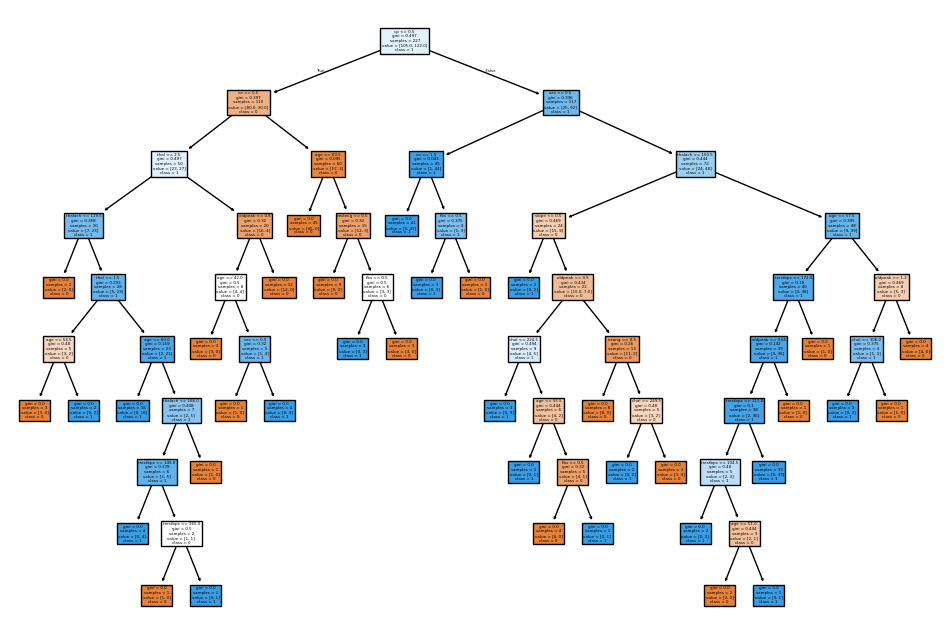

In [62]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

print(export_text(dtc, feature_names=X_train.columns.tolist()))

plt.figure(figsize=(12,8))
plot_tree(dtc, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

**Question** Search for the best decision tree using the hyperparameters `max_depth` between 2 and 10 and `criterion` which can be `gini` or `entropy`.

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': list(range(2, 11)),
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)           # best params
print(grid.best_score_)            # best cross val score
grid.best_estimator_.score(X_test, y_test)  # test set score of the best estimator


{'criterion': 'gini', 'max_depth': 6}
0.7889855072463767


0.7763157894736842

**Question** Display the tree corresponding to the best estimator.

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- thalach <= 119.50
|   |   |   |   |--- class: 0
|   |   |   |--- thalach >  119.50
|   |   |   |   |--- thal <= 1.50
|   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  54.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- thal >  1.50
|   |   |   |   |   |--- age <= 60.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  60.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.60
|   |   |   |   |--- age <= 42.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  42.00
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- oldpeak >  0.60
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- age <= 63.50
|   |   |   |--- class: 0
|   |   |--- age >  

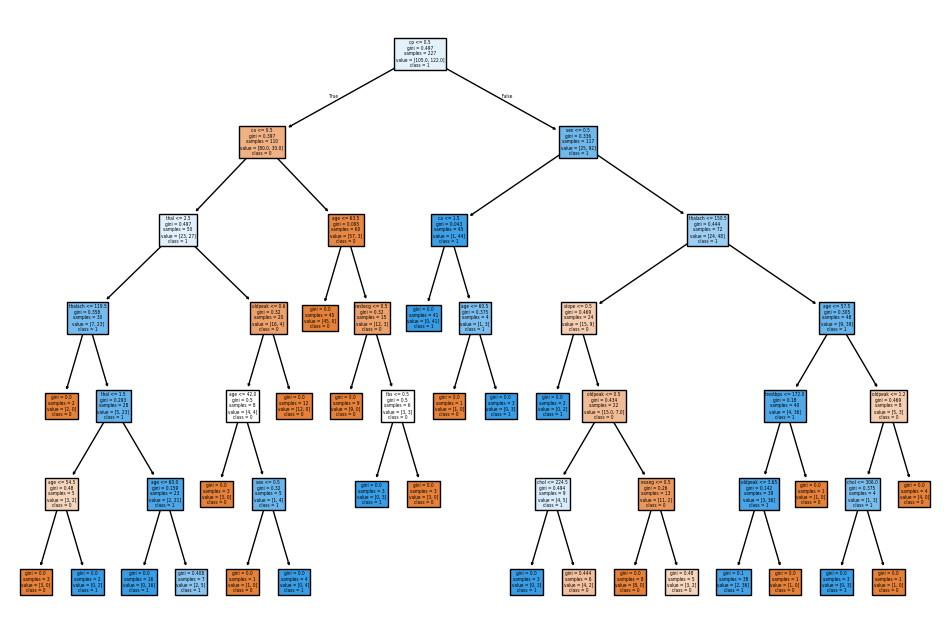

In [71]:
best_tree = grid.best_estimator_

print(export_text(best_tree, feature_names=X_train.columns.tolist()))

plt.figure(figsize=(12,8))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

# Logistic Regression 

## Observation

In [72]:
from ipywidgets import interact

def logistic_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(a, x) + b))) 

def loss_logistic(x ,a, b):
    return np.log(np.exp(-(np.dot(a, x) + b))+1)

funcs = {"loss":loss_logistic, "sigmoïde": logistic_sigmoid}
grid_size = 0.1
x_grid = np.arange(-5, 5, grid_size)

plt.clf()

def plot_logistic_sigmoid(f, a, b):
    plt.plot(x_grid, funcs[f](x_grid, a, b), '-b')
    plt.axis([-5, 5, 0, 1])
    plt.show()


interact(
    plot_logistic_sigmoid,
    a=(-10, 10, .25),
    b=(-10, 10),
    f=['sigmoïde', 'loss']
)

interactive(children=(Dropdown(description='f', options=('sigmoïde', 'loss'), value='sigmoïde'), FloatSlider(v…

<function __main__.plot_logistic_sigmoid(f, a, b)>

## Application

**Question** Import `LogisticRegression` and train a classifier. Display the score. Adjust the number of iterations...

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test) 

0.8289473684210527

**Question** Use `LogisticRegressionCV` to set the hyperparameters. What value of $C$ was found? 

In [77]:
from sklearn.linear_model import LogisticRegressionCV

log_cv = LogisticRegressionCV(cv=5, max_iter=1000)
log_cv.fit(X_train, y_train)

print(log_cv.C_)        
log_cv.score(X_test, y_test)  

[0.35938137]


0.8289473684210527

## Scaling

While this is not necessary for decision trees or NaiveBayes, it might be appropriate to normalize continuous attributes with other classifiers...

**Question** Use `StandardScaler` to normalize the continuous attributes on the train. Then compose a new dataset `X_train_scaled` with the normalized continuous attributes and the unchanged categorical attributes. We'll use `fit` to train the transformation and then `transform` to apply it to the test... giving `X_test_scaled`. 

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[attrs_cont])

X_train_scaled_cont = scaler.transform(X_train[attrs_cont])
X_test_scaled_cont  = scaler.transform(X_test[attrs_cont])

X_train_scaled = pd.DataFrame(X_train_scaled_cont, columns=attrs_cont, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled_cont, columns=attrs_cont, index=X_test.index)

for col in attrs_cat:
    X_train_scaled[col] = X_train[col]
    X_test_scaled[col]  = X_test[col]


**Question** Retrain the logistic regression classifier with this new dataset and estimate the scores.

In [82]:
log_reg_scaled = LogisticRegression(max_iter=1000)
log_reg_scaled.fit(X_train_scaled, y_train)
log_reg_scaled.score(X_test_scaled, y_test)  

0.8289473684210527

# SVC...

**Question** Even if we haven't studied this in class... we can also use the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) classifier. 

In [85]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.8421052631578947